In [1]:
from math import gcd
from qiskit import execute
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

from shor import ShorAlgorithm

In [2]:
shor = ShorAlgorithm()

In [3]:
number = 35

In [4]:
gcd_results = [(i,gcd(i,number)) for i in range(2,number)]
list_of_numbers = [tp[0] for tp in gcd_results if tp[1] == 1]
print(list_of_numbers)

[2, 3, 4, 6, 8, 9, 11, 12, 13, 16, 17, 18, 19, 22, 23, 24, 26, 27, 29, 31, 32, 33, 34]


In [5]:
a = 2
num_qubits_qft = 4

In [6]:
qc = shor.quantum_circuit(number=number, a=a, num_qubits_qft=num_qubits_qft)

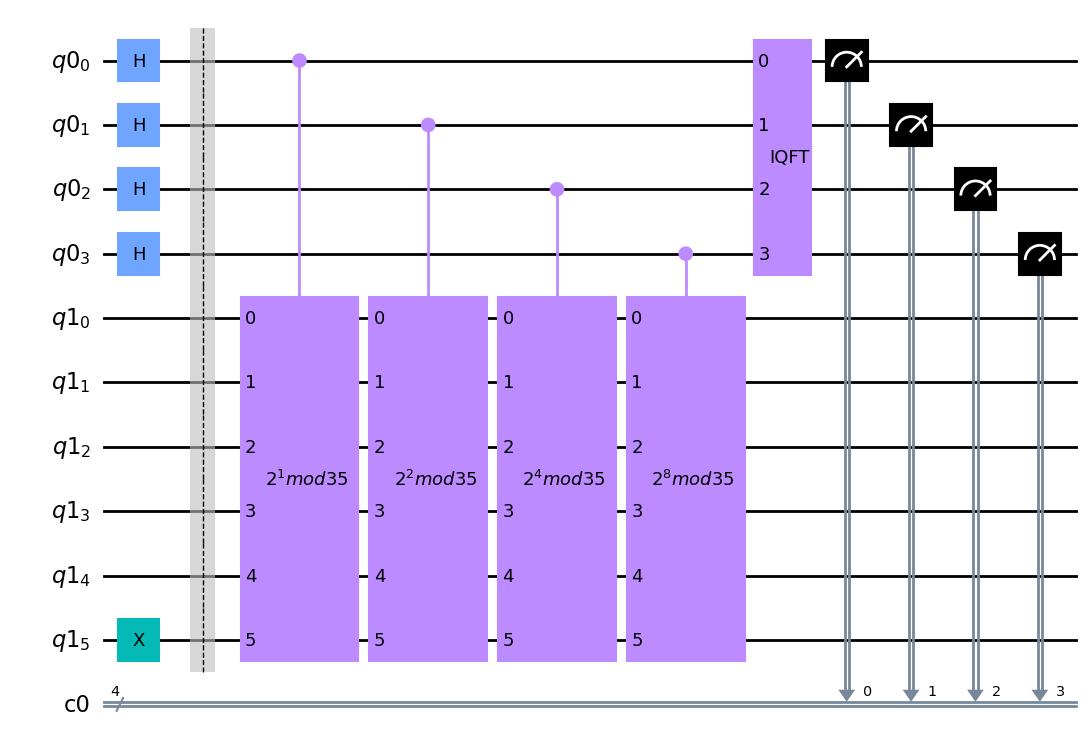

In [7]:
qc.draw(output="mpl")

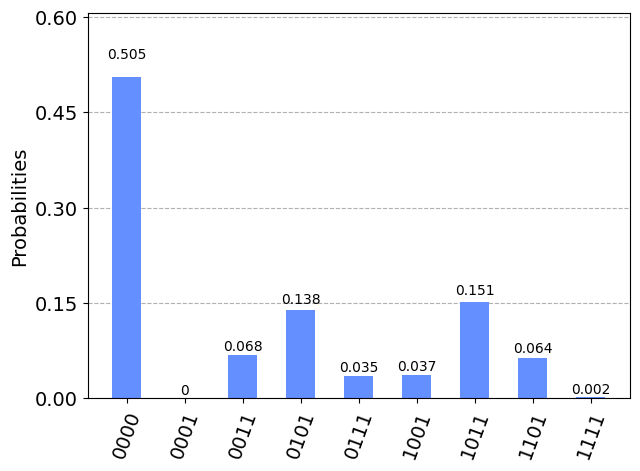

In [8]:
backend = Aer.get_backend("qasm_simulator")
counts = execute(qc, backend=backend, shots=8192).result().get_counts()
plot_histogram(counts)

In [9]:
df, factors = shor.get_number_prime_factors(number=number, counts=counts)

In [10]:
df

,register_output,phase,fraction,guess_for_r
0,1001(bin) = 9(dec),0.5625,5/9,9
1,1101(bin) = 13(dec),0.8125,9/11,11
2,0000(bin) = 0(dec),0.0000,0/1,1
3,0101(bin) = 5(dec),0.3125,4/13,13
4,0011(bin) = 3(dec),0.1875,2/11,11
5,1011(bin) = 11(dec),0.6875,9/13,13
6,0111(bin) = 7(dec),0.4375,4/9,9
7,0001(bin) = 1(dec),0.0625,1/15,15
8,1111(bin) = 15(dec),0.9375,14/15,15


In [11]:
factors

{5, 7}